## Prediction of heart disease using ML
The following approaches are going to be put in considaration.
1. problem defination.
2. Data
3. Evalutation
4. features.
This give you the information about the data that you are working with.
5. Modelling.
6. Experimentation.

In [1]:
# Regular EDA (Exploratory data analysis) and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

# Make the plots to be inside the notebook.
%matplotlib inline 

# Models frrom sklearn
from sklearn. linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation libraries.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.shape  

(303, 14)

In [3]:
## data exploration (exploration data analysis or EDA)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

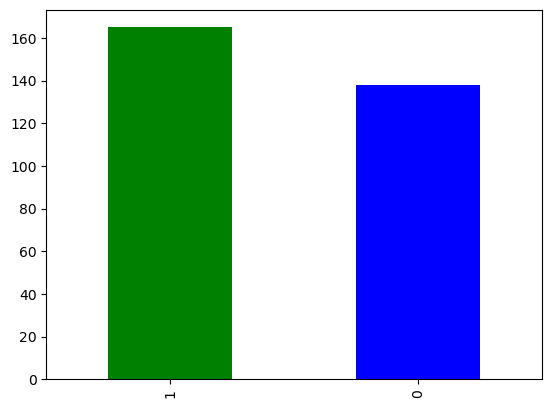

In [7]:
df['target'].value_counts().plot(kind = 'bar', color=['green', 'blue'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# comapare sex and sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


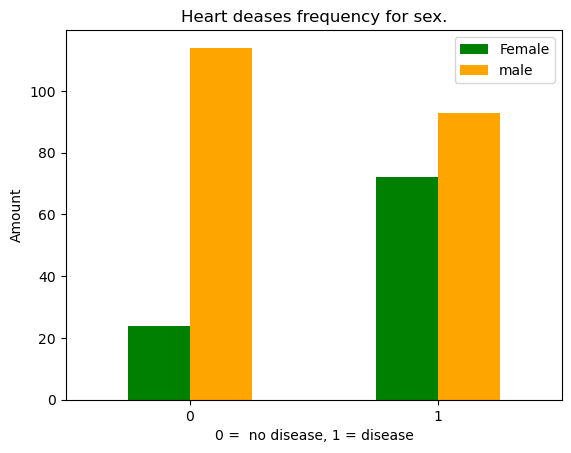

In [12]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=["green", 'orange'])
plt.title('Heart deases frequency for sex.')
plt.xlabel('0 =  no disease, 1 = disease')
plt.ylabel('Amount')
plt.legend(['Female', 'male'])
plt.xticks(rotation=0);

In [13]:
pd.crosstab(df.target, df.age).T;

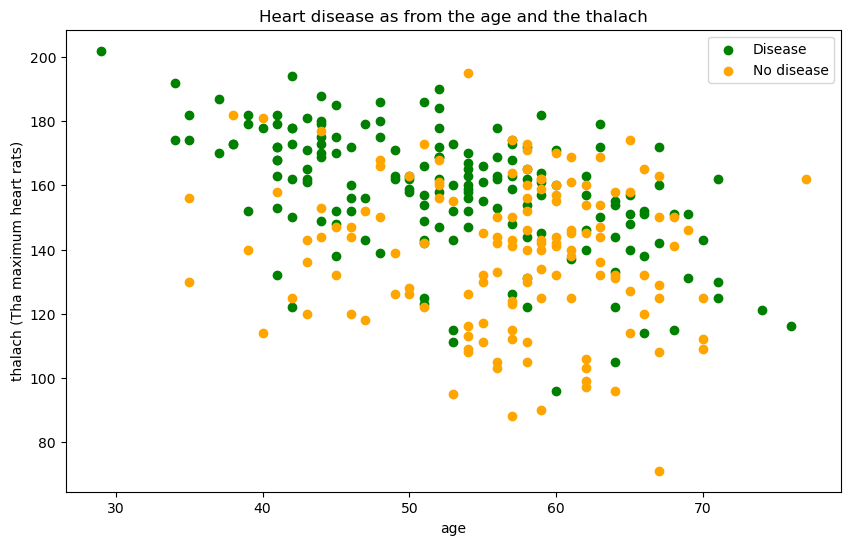

In [14]:
## Compare the relation of age and the max heart rate for heart disease
plt.figure(figsize=(10, 6))

# scatter plot
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
            c='green'),

plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c='orange')
plt.title("Heart disease as from the age and the thalach")
plt.xlabel("age")
plt.ylabel("thalach (Tha maximum heart rats)")
plt.legend(['Disease', 'No disease'])
plt.show()


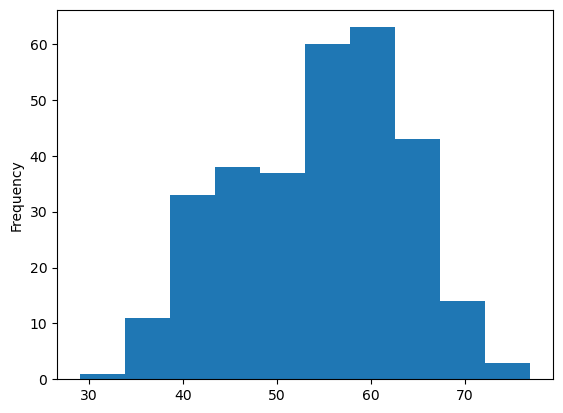

In [15]:
df.age.plot.hist();

### Heart disease frequency  per chest pain

In [16]:
pd.crossta b(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


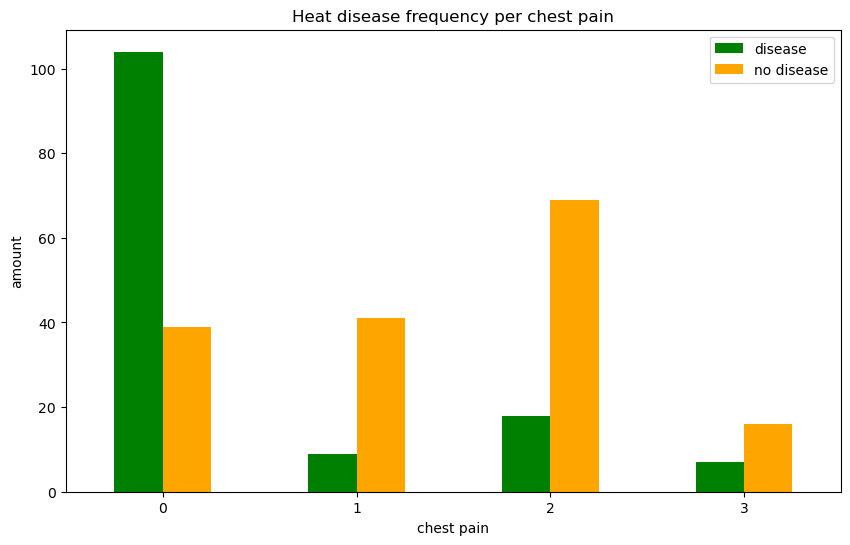

In [17]:
# Make a bar graph to make the heart disease more viisual.
pd.crosstab(df.cp, df.target).plot(kind='bar', 
                                 figsize = (10, 6),
                                 color = ['Green', 'orange'])
plt.title('Heat disease frequency per chest pain')
plt.xlabel('chest pain')
plt.ylabel('amount')
plt.xticks(rotation = 0)
plt.legend(['disease', 'no disease'])
plt.show()

In [18]:
# Make a correlation matrix. is is a tavle that is used to display the correlation coefitient of different columns.
# This is the comaparison of columns to each other.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


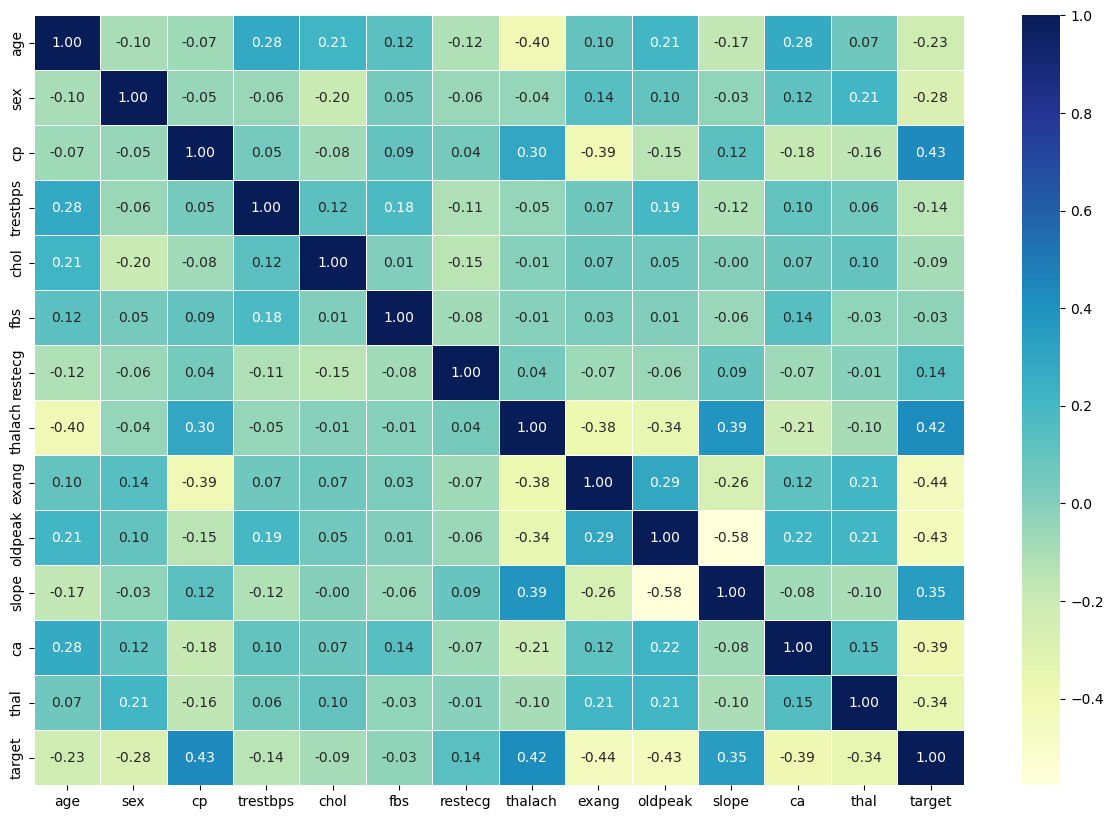

In [19]:
# Make the correlation metrics more visual
# THe hire positive corretaion value the mre depedance of he related values.
# the more negative value that means the less the value affects each ohter in
corr_matrixs = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrixs,
              annot=True,
              linewidths=0.5,
              fmt='.2f',
              cmap='YlGnBu');

## Modeling

In [20]:
# split the data into x and y
X = df.drop('target', axis = 1)
Y = df.target

In [21]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
# split the data into train and test set.
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [23]:
X_train.shape, Y_train.shape

((242, 13), (242,))

In [24]:
# creata a dictionary for all the model that we want to train.
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a funtion to fit and score the models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fit the evaluation given machine learning model.
    models: a dict of different sklearn machine learning model.
    """
    np.random.seed(42)
    # Make the dictionary to keep model scores.
    model_scores = {}
    
    for name, model in models.items():
        # Fit the model in the training data.
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores.
        model_scores[name] = model.score(X_test, Y_test)
        
    return model_scores

In [25]:
model_scores = fit_and_score(models= models,
                            X_train=X_train,
                            X_test=X_test,
                            Y_train=Y_train,
                            Y_test=Y_test)
model_scores

C:\Users\OK\Desktop\machine_learning\heart-disease-classification\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparison

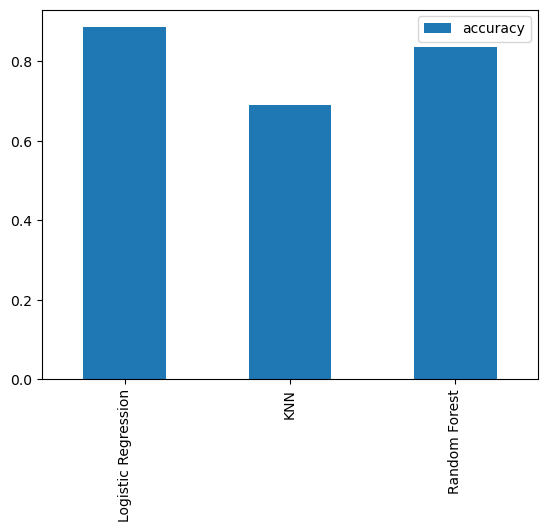

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

From the above visualization we have the base mode for the predictions.

let's put the followint in consideration.
* Hyperpatamenter tuning.
* Feature importance.
* Confusion matrix.
* Cross-validation.
* precision.
* recall.
* F1 score.
* Classification report.
* Roc curve.
* Area under the curve.

## Heyprparameter tuning.

In [27]:
# tune KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors.
neighbors = range(1, 21)

# set the instance of knn
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algorithm in the training
    knn.fit(X_train, Y_train)
    
    # Update the training score list.
    train_scores.append(knn.score(X_train, Y_train))
    
    # Update the test score list.
    test_scores.append(knn.score(X_test, Y_test))

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

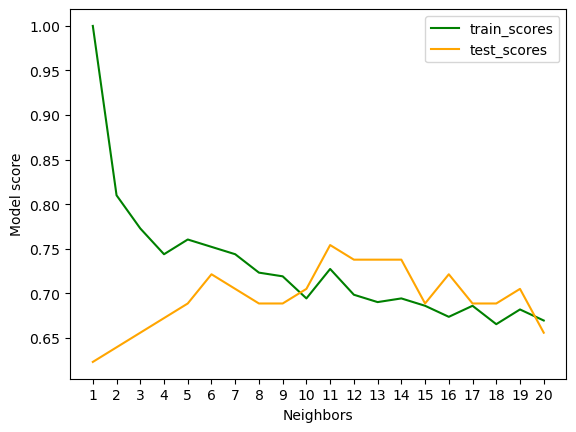

Maximum knn score on the test data: 75.41%


In [30]:
plt.plot(neighbors, train_scores, color="green")
plt.plot(neighbors, test_scores, color="orange")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Neighbors")
plt.ylabel("Model score")
plt.legend(['train_scores', 'test_scores'])
plt.show()
print(f"Maximum knn score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
tuning logisticregrassion and RandomForesClassifier using the randomizesSrarchCV

In [44]:
# create a hyperparameter grid for LogisticRigrassion.
# It is most adviced to use cross validation for the truning of the model.
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# creare a hyperparameter grid for randomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [45]:
# Tuning the logistic regression.
np.random.seed(42)

# Setup random hyperpatameter search for the logistic regression.
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# fit the hypaparameter search model for logisticRegrassion.
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [47]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [48]:
np.random.seed(42)

# Set random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
# Fit the hyperparameter search model for the randomForestclassifier
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [49]:
# find the best hyperparameters for the model.
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [50]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

In [51]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hypaparameter Tuning with the GridsearchCv


In [59]:
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

# set the pyperparameters for logisticRegression.
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the hypaparameter search model.
gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [60]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [61]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

## Evaluting our tuned machine learning classifier, beyond accuracy.

In [62]:
Y_preds = gs_log_reg.predict(X_test)
Y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
# make a plot of the roc curve and do the calculation of the area under the curve.
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(Y_test, Y_preds )

TypeError: RocCurveDisplay.__init__() takes 1 positional argument but 3 were given

In [72]:
# Confusion matrix
print(confusion_matrix(Y_test, Y_preds))

[[25  4]
 [ 3 29]]


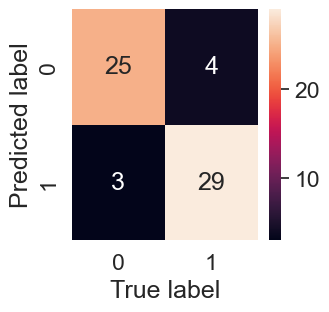

In [73]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, Y_preds):
    """
    Plot a nince loocking confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                    annot=True,
                    cbar=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(Y_test, Y_preds)

In [74]:
# find the classification report, the f1_score and cross-validation precision.
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation.

In [75]:
# Check the best params.
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [77]:
#Create a new classifier with the best params.
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')


In [79]:
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [81]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [83]:
# Cross validation precision
cv_precision = cross_val_score(clf, X, Y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [84]:
cv_recall = cross_val_score(clf, X, Y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [85]:
# cross val for f1
cv_f1 = cross_val_score(clf, X, Y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validation classification metrics'}>

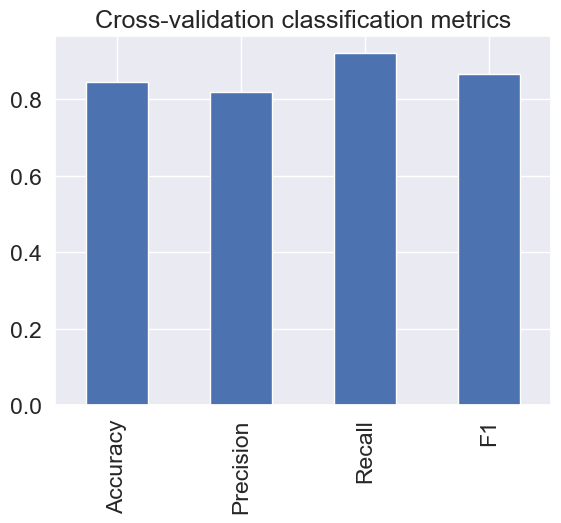

In [87]:
# Visualize cross-validation metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                         'Precision': cv_precision,
                         'Recall': cv_recall,
                         'F1': cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title='Cross-validation classification metrics',
                     legend=False)

### The Feature importance
this states the features that affected the data model.

In [88]:
# Do the refiting of the model.
clf.fit(X_train, Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [89]:
# check coef_ it gives use how each parameter affects the results.
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [91]:
# Make the dictionary of coef features.
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

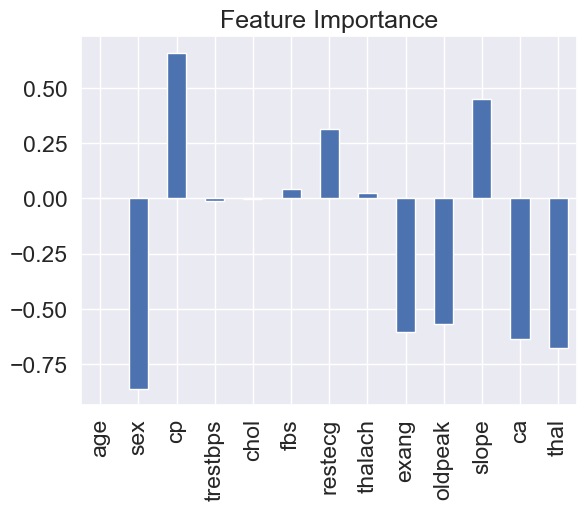

In [94]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend = False);